In [1]:
import pandas as pd

In [2]:
from nsepy import get_history as gh
import datetime as dt

In [3]:
import yfinance as yf

In [4]:
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = gh(symbol='TATACOFFEE',start=start,end=end)


In [5]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [6]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [7]:
column="Close"

In [8]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (143, 4)


In [9]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 4)
X_test length: (29, 4)
y_train length: (114, 4)
y_test length: (29, 4)


In [10]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR

trends = ['n', 'c', 'ct', 'ctt']
lags = [1, 2, 3, 4]

for lag in lags:
    for trend in trends:
        model = VAR(X_train)  # Assuming X_train is a DataFrame containing multivariate time series data
        try:
            model_fit = model.fit(maxlags=lag, trend=trend)
            y_pred = model_fit.forecast(model_fit.endog, steps=len(data1) - len(X_train))

            from stockFunctions import rmsemape
            print("Lag={}, Trend={}".format(lag, trend))
            rmsemape(y_test, y_pred)
            print("************")
        except ValueError as e:
            print(f"Error for Lag={lag}, Trend={trend}: {e}")



Lag=1, Trend=n
RMSE-Testset: 0.15955358095766442
maPe-Testset: 0.9830108033626779
************
Lag=1, Trend=c
RMSE-Testset: 0.189055052037761
maPe-Testset: 1.3018840229324022
************
Lag=1, Trend=ct
RMSE-Testset: 0.16242402284579566
maPe-Testset: 1.023415864666637
************
Lag=1, Trend=ctt
RMSE-Testset: 0.47617447627936943
maPe-Testset: 1.2401398192336754
************
Lag=2, Trend=n
RMSE-Testset: 0.16115382821336377
maPe-Testset: 1.0635676554615603
************
Lag=2, Trend=c
RMSE-Testset: 0.18240138809441467
maPe-Testset: 1.2581432138263702
************
Lag=2, Trend=ct
RMSE-Testset: 0.15915670312396404
maPe-Testset: 1.0050072984166905
************
Lag=2, Trend=ctt
RMSE-Testset: 0.5136295384852144
maPe-Testset: 1.336408000447918
************
Lag=3, Trend=n
RMSE-Testset: 0.15348185361929095
maPe-Testset: 0.9753339811329271
************
Lag=3, Trend=c
RMSE-Testset: 0.15383702859274445
maPe-Testset: 1.0671223163212866
************
Lag=3, Trend=ct
RMSE-Testset: 0.16258300690423924

In [11]:
len(y_pred)

29

In [12]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import VAR

# Assuming X_train is a DataFrame containing multivariate time series data
model = VAR(X_train)
model_fit = model.fit(maxlags=3, trend='n')  # Adjust lag and trend as needed

# Specify the number of steps to forecast (len(data1) - len(X_train))
steps = len(data1) - len(X_train)

# Make predictions
y_pred = model_fit.forecast(model_fit.endog, steps=steps)

# Now, you can evaluate the predictions using your preferred evaluation metrics
from stockFunctions import rmsemape
rmsemape(y_test, y_pred)


RMSE-Testset: 0.15348185361929095
maPe-Testset: 0.9753339811329271


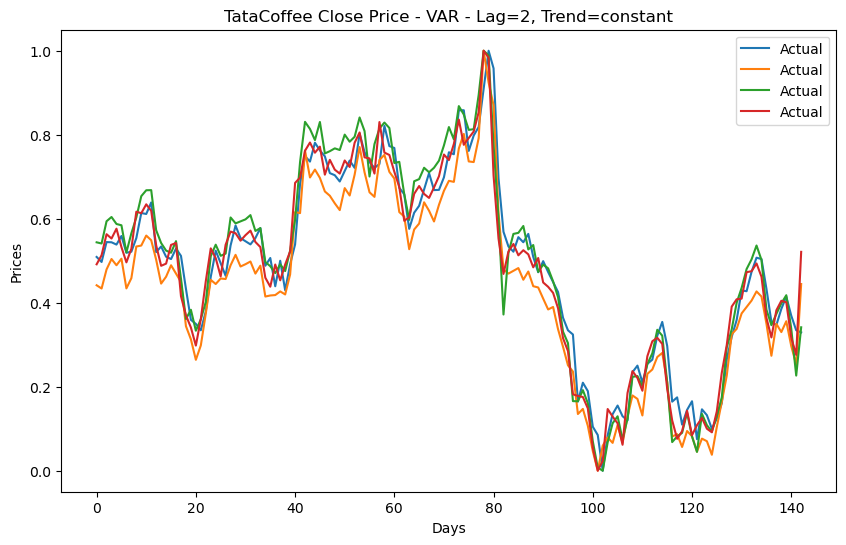

In [14]:
import matplotlib.pyplot as plt
i = 2
td = "constant"
plt.figure(figsize=(10, 6))
plt.plot(data1, label='Actual')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.title('TataCoffee Close Price - VAR - Lag={}, Trend={}'.format(i, td))
plt.legend()
plt.show()